In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from enterprise.pulsar import Pulsar

In [88]:
psrname = 'J1600-3053'#'B1937+21'
filepath = './no_dmx_pickles/'
filepath += '{0}_ng12p5yr_v3_nodmx_ePSR.pkl'.format(psrname)
with open(filepath,'rb') as fin:
    psr=pickle.load(fin)

In [89]:
sec_to_day = 24*3600

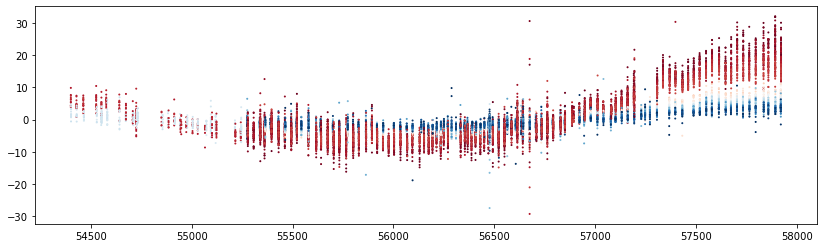

In [90]:
plt.figure(figsize=[14,4])
plt.scatter(x=psr.toas/sec_to_day,
            y=psr.residuals*1e6,
            s=1,
            c=psr.freqs,cmap='RdBu')
plt.show()

In [91]:
#Load DMX values
dtypes = {'names': ('DMXEP', 'DMX_value', 'DMX_var_err', 
                    'DMXR1', 'DMXR2', 'DMXF1', 
                    'DMXF2', 'DMX_bin'),
          'formats': ('f4','f4','f4','f4','f4','f4','f4','U6')}
dmx = np.loadtxt('./dmx/{0}_NANOGrav_12yv3.dmx'.format(psrname),
                 skiprows=4,
                 dtype=dtypes)

In [92]:
bins = np.abs(np.array(dmx[['DMXR1','DMXR2']].tolist())
              - np.array([dmx['DMXEP'],dmx['DMXEP']]).T)

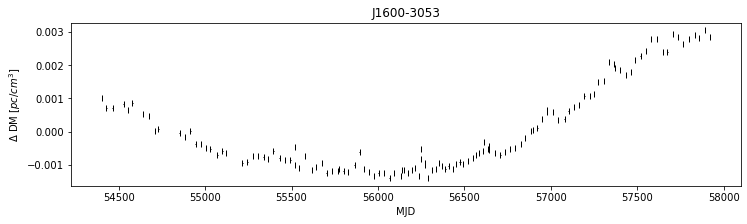

In [93]:
plt.figure(figsize=[12,3])
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
#              yerr=dmx['DMX_var_err'],
             marker = '|', color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
plt.title(psrname)
plt.show()

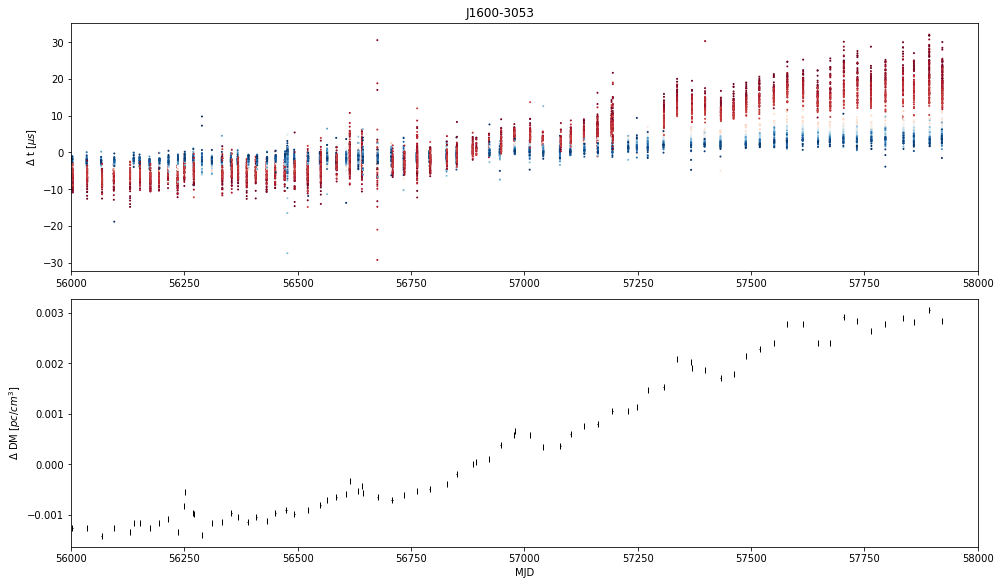

In [94]:
fig=plt.figure(figsize=[14,8])

fig.add_subplot(211)
plt.scatter(x=psr.toas/sec_to_day,
            y=psr.residuals*1e6,#*psr.freqs**2*2.41e-4,
            s=1,
            c=psr.freqs,cmap='RdBu')
plt.ylabel(r'$\Delta$ t [$\mu s$]')
plt.xlim(56000,58000)

fig.add_subplot(212)
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
#              yerr=dmx['DMX_var_err'],
             marker = '|', color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
plt.xlim(56000,58000)
fig.suptitle(psrname,y=1.01)
fig.tight_layout()
plt.show()

In [95]:
fullpta_path = '/Users/hazboun/nanograv_detection/12p5yr/channelized_12yr_v3_partim_py3.pkl'
with open(fullpta_path,'rb') as fin:
    psrs=pickle.load(fin)

In [96]:
psrnames = [p.name for p in psrs]

In [97]:
pidx = psrnames.index(psrname)
psr_dmx = psrs[pidx]

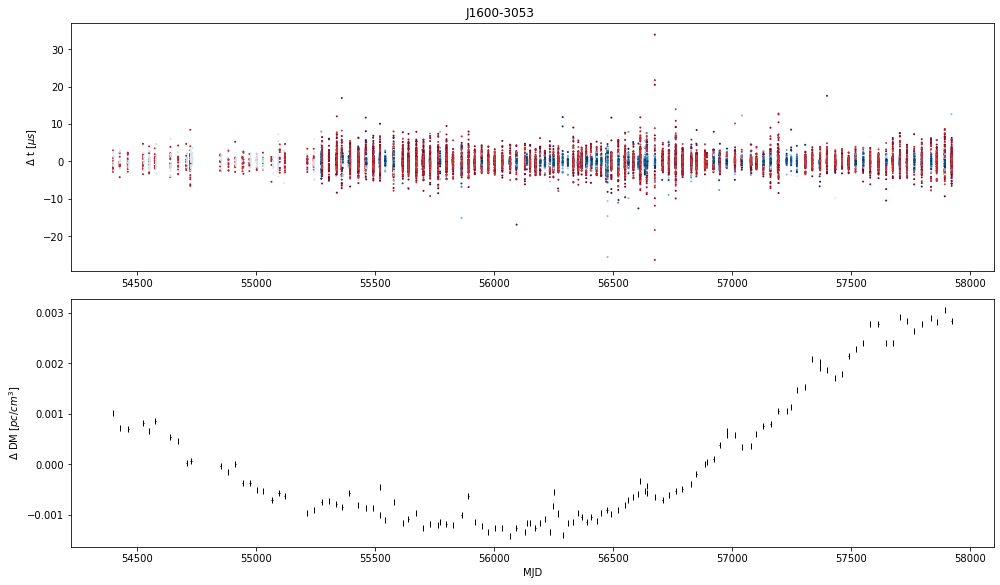

In [98]:
fig=plt.figure(figsize=[14,8])

fig.add_subplot(211)
plt.scatter(x=psr_dmx.toas/sec_to_day,
            y=psr_dmx.residuals*1e6,#*psr.freqs**2*2.41e-4,
            s=1,
            c=psr_dmx.freqs,cmap='RdBu')
plt.ylabel(r'$\Delta$ t [$\mu s$]')
# plt.xlim(56000,58000)

fig.add_subplot(212)
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
#              yerr=dmx['DMX_var_err'],
             marker = '|', color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
# plt.xlim(56000,58000)
fig.suptitle(psrname,y=1.01)
fig.tight_layout()
plt.show()

In [100]:
dmx[['DMXR1']]

array([(54400.64 ,), (54428.594,), (54462.5  ,), (54526.32 ,),
       (54551.25 ,), (54576.17 ,), (54641.008,), (54672.914,),
       (54707.82 ,), (54724.902,), (54850.43 ,), (54882.344,),
       (54913.258,), (54942.18 ,), (54973.094,), (55004.008,),
       (55029.938,), (55065.84 ,), (55094.773,), (55118.707,),
       (55214.457,), (55243.363,), (55275.273,), (55307.21 ,),
       (55337.11 ,), (55361.043,), (55390.02 ,), (55429.9  ,),
       (55461.812,), (55492.684,), (55520.625,), (55521.625,),
       (55543.586,), (55578.492,), (55616.344,), (55639.33 ,),
       (55674.25 ,), (55700.18 ,), (55731.094,), (55765.957,),
       (55773.934,), (55799.863,), (55826.8  ,), (55863.7  ,),
       (55892.617,), (55918.547,), (55948.465,), (55976.508,),
       (56002.473,), (56034.332,), (56066.246,), (56094.184,),
       (56130.09 ,), (56138.086,), (56150.984,), (56172.934,),
       (56193.87 ,), (56213.82 ,), (56234.87 ,), (56249.742,),
       (56250.734,), (56269.605,), (56270.676,), (56288